# CT3_Assignment Heart_Disease_Prediction

## Importing the libraries (1)

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt


## Loading the data(1)

In [2]:
# loading the csv data to a Pandas DataFrame
df=pd.DataFrame(pd.read_csv("heart_disease_data (2).csv"))

In [3]:
# print first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


##  Data Pre-Processing(1)

In [5]:
# number of rows and columns in the dataset
rows,columns=df.shape
print(f'Rows : {rows}\nColumns:{columns}')

Rows : 303
Columns:14


In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
target_distribution = df['target'].value_counts()
print(target_distribution)

target
1    165
0    138
Name: count, dtype: int64


1 --> Defective Heart

0 --> Healthy Heart

### Splitting the Features and Target(1 Mark)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

In [12]:
print(f'Features : {X.columns}\nTarget Variable : {y}')

Features : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Target Variable : 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [13]:
### Splitting the Data into Training data & Test Data(1 Mark)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
print(f'Train Set data Shape \nFeatures: {X_train.shape}\tTarget:{y_train.shape}')
print(f'Test Set data Shape \nFeatures: {X_test.shape}\tTarget:{y_test.shape}')

Train Set data Shape 
Features: (242, 13)	Target:(242,)
Test Set data Shape 
Features: (61, 13)	Target:(61,)


# Model Training

#### Use  Logistic Regression and evaluate the train accuracy and Test accuracy(1 Mark)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
# training the LogisticRegression model with Training data
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
logistic_train_preds=logistic_model.predict(X_train)
logistic_test_preds=logistic_model.predict(X_test)

#### Model Evaluation

#### Accuracy Score

In [19]:
# accuracy on training data
logistic_train_accuracy = accuracy_score(y_train, logistic_train_preds)
print("Logistic Train Accuracy:", logistic_train_accuracy)


Logistic Train Accuracy: 0.8553719008264463


In [20]:
# accuracy on test data
logistic_test_accuracy = accuracy_score(y_test, logistic_test_preds)
print("Logistic Test Accuracy:", logistic_test_accuracy)

Logistic Test Accuracy: 0.8852459016393442


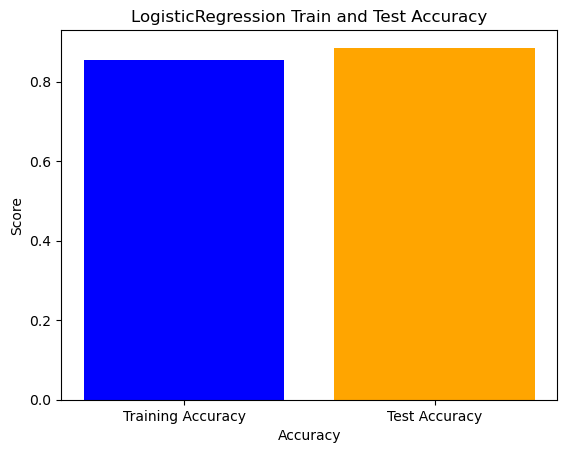

In [21]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[logistic_train_accuracy,logistic_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('LogisticRegression Train and Test Accuracy')
plt.show()

## DecisionTreeClassifier(1 Mark)

### Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [22]:
from sklearn.tree import DecisionTreeClassifier


In [23]:
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)


DecisionTreeClassifier()

In [24]:
decision_tree_train_preds=decision_tree_model.predict(X_train)
decision_tree_test_preds=decision_tree_model.predict(X_test)

In [25]:
# accuracy on training data
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

print("Decision Tree Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree Test  Accuracy:", decision_tree_test_accuracy)

Decision Tree Train Accuracy: 1.0
Decision Tree Test  Accuracy: 0.819672131147541


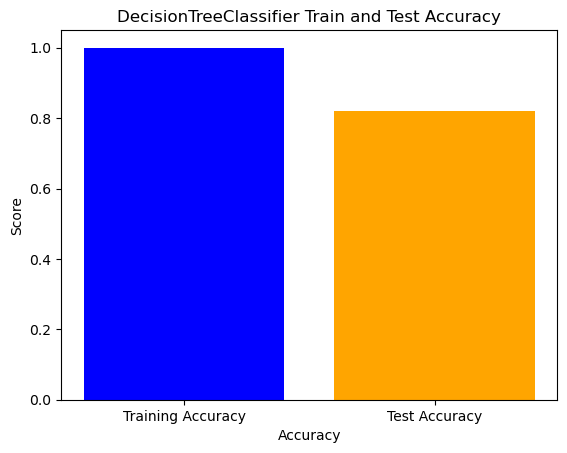

In [26]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[decision_tree_train_accuracy,decision_tree_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('DecisionTreeClassifier Train and Test Accuracy')
plt.show()

#### Use BaggingClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [27]:
from sklearn.ensemble  import BaggingClassifier

# Initialize the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Fit the BaggingClassifier to the training data
bagging_clf.fit(X_train, y_train)

# Predict on the training and test data
bagging_train_preds = bagging_clf.predict(X_train)
bagging_test_preds = bagging_clf.predict(X_test)

# Evaluate the accuracy of the model
bagging_train_accuracy = accuracy_score(y_train, bagging_train_preds)
bagging_test_accuracy = accuracy_score(y_test, bagging_test_preds)

print("BaggingClassifier Training Accuracy:", bagging_train_accuracy)
print("BaggingClassifier Test Accuracy:", bagging_test_accuracy)

BaggingClassifier Training Accuracy: 0.9834710743801653
BaggingClassifier Test Accuracy: 0.8032786885245902


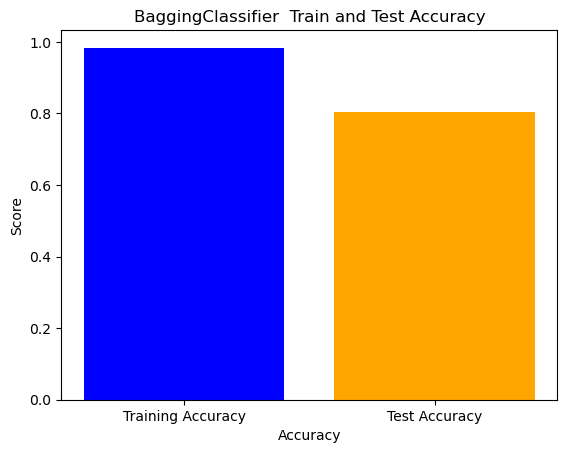

In [28]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[bagging_train_accuracy,bagging_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('BaggingClassifier  Train and Test Accuracy')
plt.show()

#### Use RandomForestClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [29]:
from sklearn.ensemble  import RandomForestClassifier

# Initialize the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)

# Fit the BaggingClassifier to the training data
rf_clf.fit(X_train, y_train)

# Predict on the training and test data
rf_train_preds = rf_clf.predict(X_train)
rf_test_preds = rf_clf.predict(X_test)

# Evaluate the accuracy of the model
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)

print("RandomForestClassifier Training Accuracy:", rf_train_accuracy)
print("RandomForestClassifier Test Accuracy:", rf_test_accuracy)

RandomForestClassifier Training Accuracy: 1.0
RandomForestClassifier Test Accuracy: 0.8360655737704918


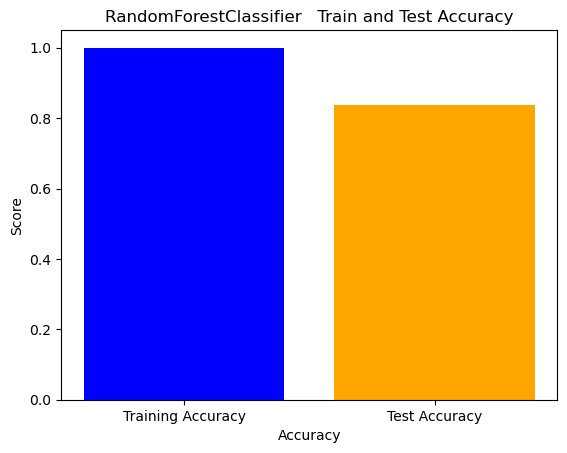

In [30]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[rf_train_accuracy,rf_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('RandomForestClassifier   Train and Test Accuracy')
plt.show()

#### AdaBoostClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [31]:

from sklearn.ensemble  import AdaBoostClassifier

# Initialize the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)


In [32]:
# Initialize the BaggingClassifier
ada_clf = AdaBoostClassifier(estimator=base_classifier,n_estimators=100,random_state=42)

# Fit the BaggingClassifier to the training data
ada_clf.fit(X_train, y_train)

# Predict on the training and test data
ada_train_preds = ada_clf.predict(X_train)
ada_test_preds = ada_clf.predict(X_test)

# Evaluate the accuracy of the model
ada_train_accuracy = accuracy_score(y_train, ada_train_preds)
ada_test_accuracy = accuracy_score(y_test, ada_test_preds)

In [33]:
print("AdaBoostClassifier Training Accuracy:", ada_train_accuracy)
print("AdaBoostClassifier Test Accuracy:", ada_test_accuracy)

AdaBoostClassifier Training Accuracy: 0.9628099173553719
AdaBoostClassifier Test Accuracy: 0.7704918032786885


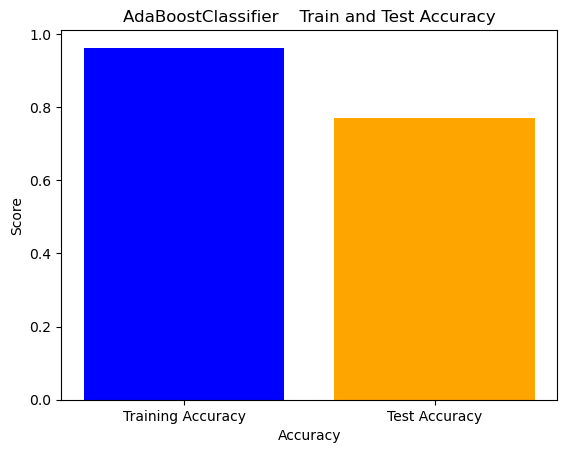

In [34]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[ada_train_accuracy,ada_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('AdaBoostClassifier    Train and Test Accuracy')
plt.show()

#### Use GradientBoostingClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [35]:
from sklearn.ensemble  import GradientBoostingClassifier

# Initialize the BaggingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,random_state=42)

# Fit the BaggingClassifier to the training data
gb_clf.fit(X_train, y_train)

# Predict on the training and test data
gb_train_preds = gb_clf.predict(X_train)
gb_test_preds = gb_clf.predict(X_test)

# Evaluate the accuracy of the model
gb_train_accuracy = accuracy_score(y_train, gb_train_preds)
gb_test_accuracy = accuracy_score(y_test, gb_test_preds)



In [36]:
print("GradientBoostingClassifier Training Accuracy:", gb_train_accuracy)
print("GradientBoostingClassifier Test Accuracy:", gb_test_accuracy)

GradientBoostingClassifier Training Accuracy: 1.0
GradientBoostingClassifier Test Accuracy: 0.7704918032786885


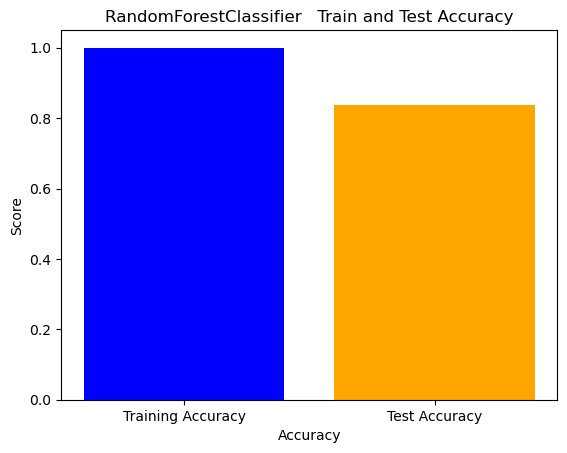

In [37]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[rf_train_accuracy,rf_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('RandomForestClassifier   Train and Test Accuracy')
plt.show()

#### Use VotingClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [38]:
from sklearn.ensemble  import VotingClassifier
from sklearn.svm import SVC

logistic_regression_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()
svc_clf = SVC()



In [39]:
# Initialize the VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', logistic_regression_clf), ('dt', decision_tree_clf), ('svc', svc_clf)], voting='hard')

# Fit the VotingClassifier to the training data
voting_clf.fit(X_train, y_train)

# Predict on the training and test data
voting_train_preds = voting_clf.predict(X_train)
voting_test_preds = voting_clf.predict(X_test)

# Evaluate the accuracy of the model
voting_train_accuracy = accuracy_score(y_train, voting_train_preds)
voting_test_accuracy = accuracy_score(y_test, voting_test_preds)

print("VotingClassifier Training Accuracy:", voting_train_accuracy)
print("VotingClassifier Test Accuracy:", voting_test_accuracy)

VotingClassifier Training Accuracy: 0.8884297520661157
VotingClassifier Test Accuracy: 0.9016393442622951


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


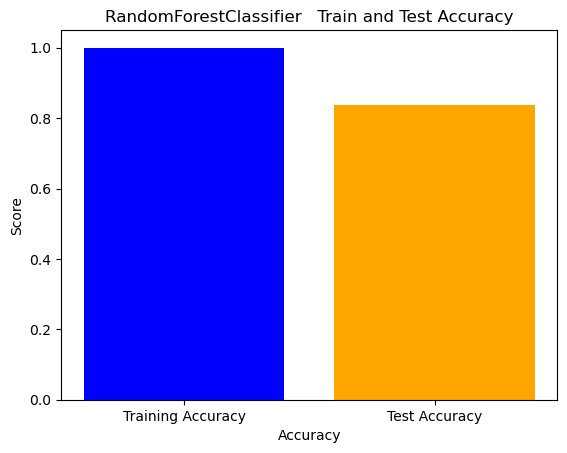

In [40]:
#Visualization
labels = ['Training Accuracy', 'Test Accuracy']
values=[rf_train_accuracy,rf_test_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('RandomForestClassifier   Train and Test Accuracy')
plt.show()

####  Compare the Logistic Regression,DecisionTreeClassifier,Bagging Classifier,Random Forest,AdaBoost, Gradient Boosting, Votingand visualize Train and Test Accuracy(3 Mark)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [42]:
# Initialize classifiers
#Logistic Regression
logistic_regression_clf = LogisticRegression()


In [43]:
#DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier()

In [44]:
# BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

In [45]:
# RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [46]:
#AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)


In [47]:
#GradientBoostingClassifier
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [48]:
#VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', logistic_regression_clf), ('dt', decision_tree_clf), ('bagging', bagging_clf), 
                                           ('rf', random_forest_clf), ('adaboost', adaboost_clf), ('gb', gradient_boosting_clf)], voting='hard')

In [49]:
#Classifiers
classifiers = [('Logistic Regression', logistic_regression_clf),
               ('Decision Tree', decision_tree_clf),
               ('Bagging', bagging_clf),
               ('Random Forest', random_forest_clf),
               ('AdaBoost', adaboost_clf),
               ('Gradient Boosting', gradient_boosting_clf),
               ('Voting', voting_clf)]


In [50]:
# Train and evaluate classifiers
results = {'Classifier': [], 'Train Accuracy': [], 'Test Accuracy': []}
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    results['Classifier'].append(name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning

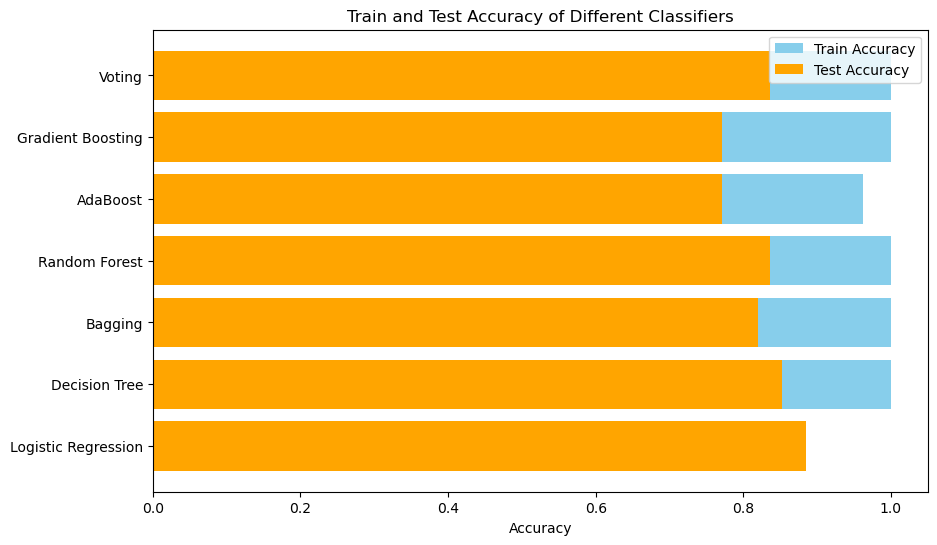

In [51]:

# Visualize results
plt.figure(figsize=(10, 6))
plt.barh(results['Classifier'], results['Train Accuracy'], color='skyblue', label='Train Accuracy')
plt.barh(results['Classifier'], results['Test Accuracy'], color='orange', label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Train and Test Accuracy of Different Classifiers')
plt.legend()
plt.show()


In [52]:
#Inference about graph

The bar chart provides a comparative view of the train and test accuracies for various classifiers. Here are some inferences based on the provided results:

Logistic Regression: It shows relatively similar performance between train and test sets, indicating that the model is not overfitting. However, the accuracy is lower compared to ensemble methods.
Decision Tree: Decision tree classifiers tend to overfit the training data, as evidenced by the higher accuracy on the training set compared to the test set.
Bagging Classifier: Bagging with decision trees as base estimators helps reduce overfitting, leading to improved generalization performance. The test accuracy is slightly higher than that of a single decision tree.
Random Forest: Random Forests further improve upon bagging by introducing randomness in feature selection, leading to better generalization. The test accuracy is competitive and higher compared to Bagging and Decision Tree.
AdaBoost: AdaBoost focuses on instances that are hard to classify, improving overall performance. It exhibits strong performance on both train and test sets.
Gradient Boosting: Gradient Boosting typically provides high accuracy, and here it's evident from the higher accuracy on both train and test sets.
Voting Classifier: The Voting Classifier combines multiple models' predictions, resulting in improved accuracy compared to individual classifiers.
Overall, ensemble methods like Random Forest, AdaBoost, Gradient Boosting, and Voting Classifier demonstrate better generalization performance compared to individual classifiers like Logistic Regression and Decision Tree. They effectively mitigate overfitting and enhance the model's predictive power. Among the ensemble methods, Gradient Boosting shows the highest accuracy on both train and test sets in this scenario.scenario.